## Video Games Sales Analysis and Visualization
<b> The Dataset I worked on contains a list of video games with sales in a different region. In the beginning of this project, I cleaned the dataset using Pandas as there were some none values and inadequate information. Then I tried to show some key information on the dataset. For example, top games, top genre, highest sales, etc. The whole point of this project is to show a different kind of visualization using Python Matplotlib and Seaborn Library and understand what the dataset tells. </b> <br><br>  <b>N.B: This dataset does not have adequate information from 2017 onwards.</b>  <br><b>  </b><br>[Data set link](https://www.kaggle.com/gregorut/videogamesales) <br> <b>Columns</b>
<ul>
<li>Name - The games name</li>
<li>Platform - Platform of the games release (i.e. PC,PS4, etc.)</li>
<li>Year - Year of the game's release</li>
    <li>Genre - Genre of the game</li>
    <li>Publisher - Publisher of the game</li>
    <li>NA_Sales - Sales in North America (in millions)</li>
    <li>EU_Sales - Sales in Europe (in millions)</li>
    <li>JP_Sales - Sales in Japan (in millions)</li>
    <li>Other_Sales - Sales in the rest of the world (in millions)</li>
    <li>Global_Sales - Total worldwide sales.</li>
</ul>

### Importing Necessary Library

In [2]:
%autosave 10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Autosaving every 10 seconds


### Importing Data

In [3]:
df = pd.read_csv('vgsales.csv')

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Overview of Datafset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.shape

(16598, 11)

-    Since there are some null object, lets find out these in percentage because it would be easier to understand.

In [7]:
nullvalues_percentage = df.isna().sum()*100 / df.shape[0]
nullvalues_percentage

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

-    There are only 1.6% of Year and .3% of Publisher null value. If we delete these we would not loose lots of data.

In [8]:
df.dropna(inplace = True)

In [9]:
nullvalues_percentage = df.isna().sum()*100 / df.shape[0]
nullvalues_percentage

Rank            0.0
Name            0.0
Platform        0.0
Year            0.0
Genre           0.0
Publisher       0.0
NA_Sales        0.0
EU_Sales        0.0
JP_Sales        0.0
Other_Sales     0.0
Global_Sales    0.0
dtype: float64

### Off-topic: If you want to use different theme for jupyter notebook could go to this link [theme](https://towardsdatascience.com/optimizing-jupyter-notebook-tips-tricks-and-nbextensions-26d75d502663)

In [10]:
# Uncomment the below line and install jupyterthemes. 
#!pip install jupyterthemes

In [11]:
# To show all available theme
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [12]:
# To apply a theme  #do not forget to uncomment

#!jt -t chesterish

In [13]:
# To go back to the default theme 

#!jt -r

### Data types of each column

In [14]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

-    We can see the year is in float format. We can change this to int format

In [15]:
convert = {'Year':int}

df = df.astype(convert)

In [16]:
df.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


-   Let's check number of entries in each year

In [16]:
df['Year'].value_counts().sort_values(ascending = True).head()

2020     1
2017     3
1980     9
1984    14
1985    14
Name: Year, dtype: int64

- We see there are only three and one entry for the year 2017, 2020 consecutively. This is not enough to get the real picture so we can ignore these entries.

In [17]:
# Dropping rows with the year 2017 and 2020
drop = df.drop(df[(df['Year'] == 2017) | (df['Year'] == 2020)].index, inplace= True)

#### Let's find out the unique values of Genre as well as the number as most of the task will be around this column

In [18]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

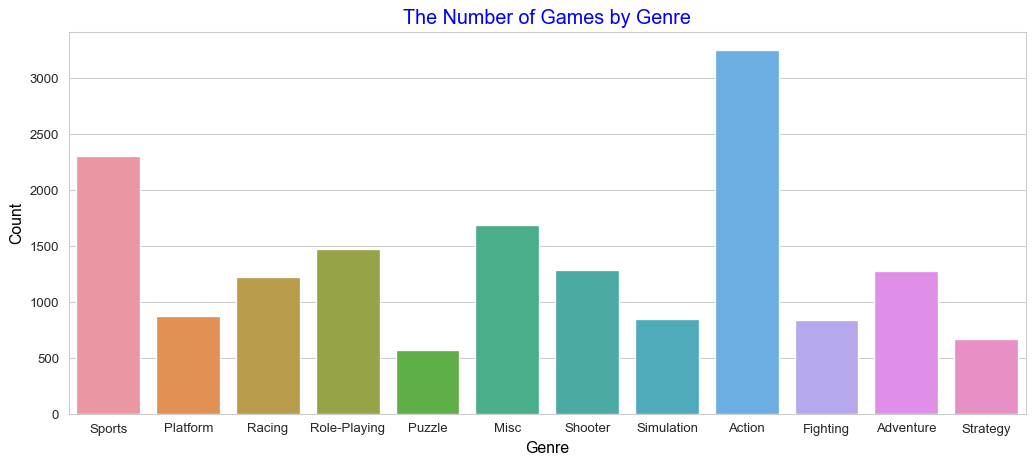

In [25]:
# Figure style
plt.figure(figsize=[11,5], dpi= 95)
sns.set_style(style= 'whitegrid')

# Plot
sns.countplot(x=df['Genre'])

# Axis and title label
plt.xlabel('Genre',fontsize=12, color='black')
plt.ylabel('Count',fontsize=12, color='black')
plt.title('The Number of Games by Genre', fontsize= 15, color= 'blue')

plt.tight_layout()

-   We see that the action genre is the highest number of produced games 

### Now, we will see how many games has beed produced in each year

Text(0.5, 1.0, 'Number of Produced Games in Each Year')

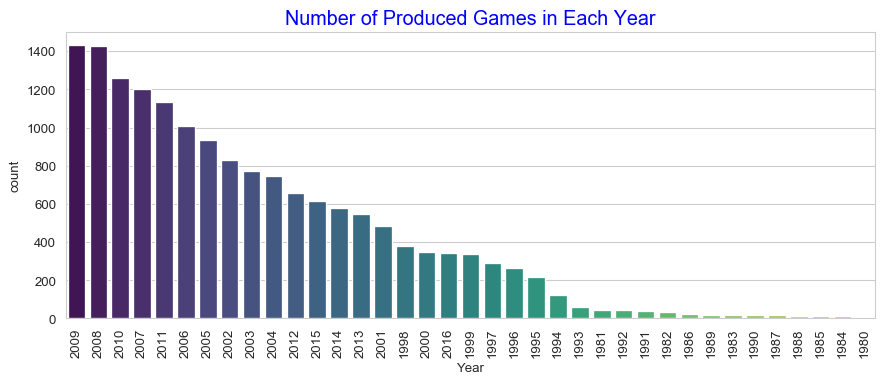

In [31]:
plt.figure(figsize=[11,4], dpi= 95)

sns.countplot(x=df['Year'], palette='viridis', order= df['Year'].value_counts().index)

plt.xticks(rotation = 90)
plt.title('Number of Produced Games in Each Year', fontsize= 15, color= 'blue')

### No, we can check number of released games by genre in each year.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

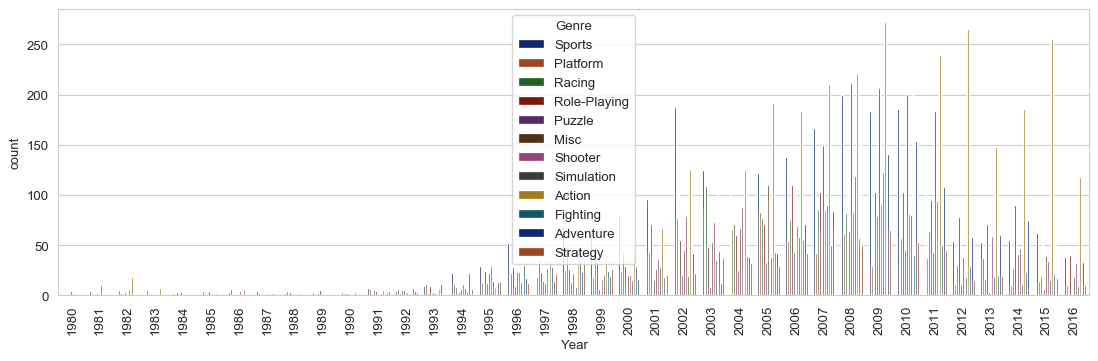

In [32]:
plt.figure(figsize=[14,4], dpi= 95)

sns.countplot(x='Year',data=df, hue= 'Genre', palette="dark")

plt.xticks(rotation=90)

-   It looks kind of messy here. We can make this graph for top five years which had most released games.  

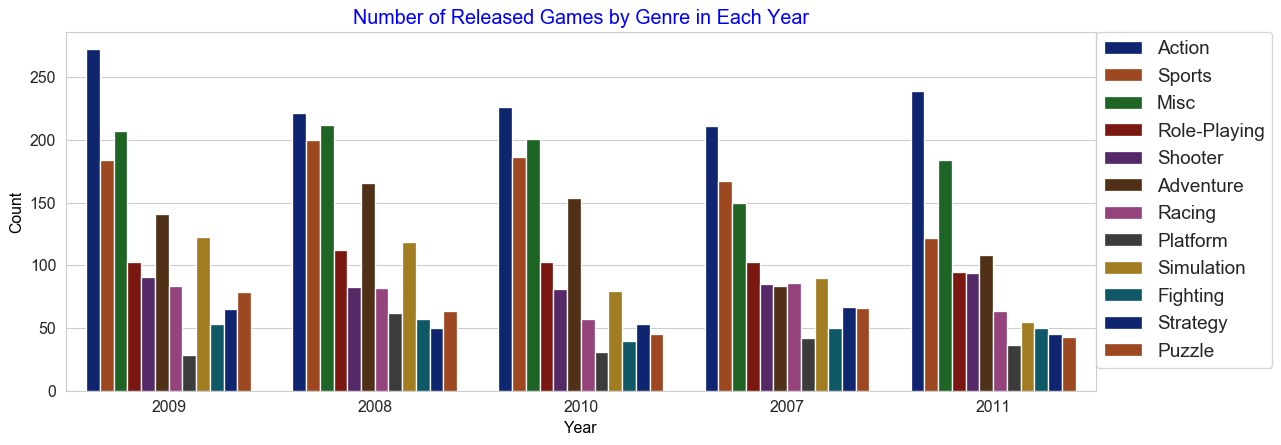

In [40]:
plt.figure(figsize=[14,5], dpi= 95)

sns.countplot(x='Year',data=df, hue= 'Genre', palette="dark", order= df['Year'].value_counts().head().index, 
              hue_order=df['Genre'].value_counts().index)

# Axis label
plt.xlabel('Year',fontsize=12, color='black')
plt.ylabel('Count',fontsize=12, color='black')

# Axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Title
plt.title('Number of Released Games by Genre in Each Year', fontsize= 15, color= 'blue')

# Legend
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0, fontsize= 'x-large')

#### Now, let's figure out the evolution in number of games for each genre.

In [37]:
# Number of entries for each genre to find out the number of games
genre_count_by_year = df.groupby(by= ['Year','Genre']).count()

# Unstack method
genre_count_by_year = genre_count_by_year['Rank'].unstack()
genre_count_by_year.head(3)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,1.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN
1981,25.0,NaN,NaN,NaN,3.0,2.0,1.0,NaN,10.0,1.0,4.0,NaN
1982,18.0,NaN,NaN,1.0,5.0,3.0,2.0,NaN,5.0,NaN,2.0,NaN


-  There are so many NaN values. We can easily assume this NaN value means zero game produced on that year. So we will replace Nan values with zero and we are also gonna reduce the number of years. We will take count year 1994 onward.

In [38]:
# Replacing the NaN values with 0
genre_count_by_year.fillna(0, inplace= True)

# Dropping the rows of between year 1980 to 1999 inclusive
genre_count_by_year.drop(range(1980, 1995), axis= 0, inplace= True)

In [39]:
genre_count_by_year.head(2)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1995,8.0,13.0,29.0,22.0,13.0,12.0,12.0,24.0,29.0,14.0,29.0,14.0
1996,20.0,17.0,30.0,23.0,14.0,9.0,22.0,28.0,23.0,13.0,52.0,12.0


Text(0, 0.5, 'Number of Games')

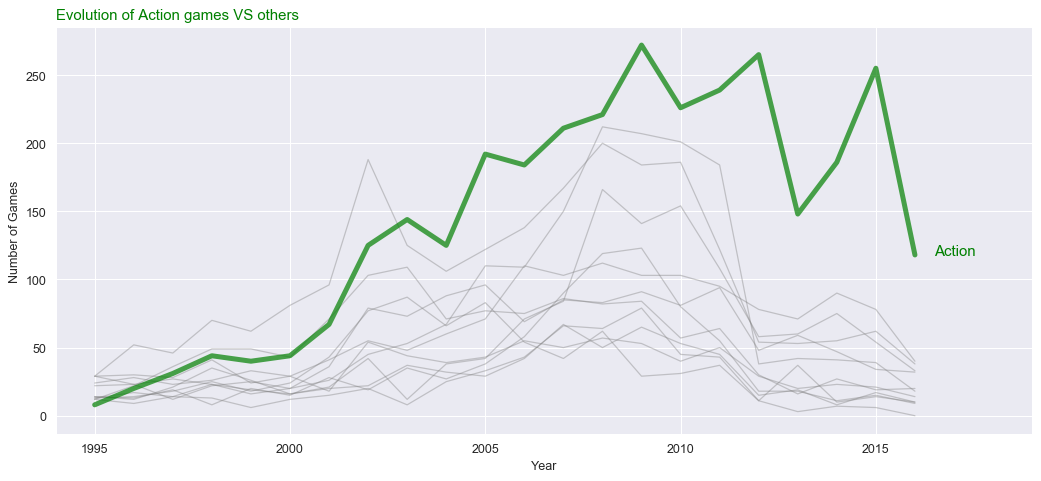

In [40]:
# Evolution of Action games only
# Figure style
sns.set_style('darkgrid')
fig_dpi=90
plt.figure(figsize=(14,6), dpi=fig_dpi)

# Line plot
for column in genre_count_by_year.drop('Action', axis=1):
    plt.plot(genre_count_by_year[column], marker= '', color= 'grey', linewidth=1, alpha=0.4)
    
# The highlighted plot with specific genre
plt.plot(genre_count_by_year['Action'], marker= '', color= 'green', linewidth=4, alpha=0.7)

# Increasing the xlimit as we need to add annotation
plt.xlim(1994,2019)

# Adding annotation
plt.text(2016.5, genre_count_by_year.Action.tail(1), 'Action', horizontalalignment='left', size='large', color='green')

# Titles and axis label
plt.title("Evolution of Action games VS others", loc='left', fontsize=12, fontweight=0, color='green')
plt.xlabel("Year")
plt.ylabel("Number of Games")

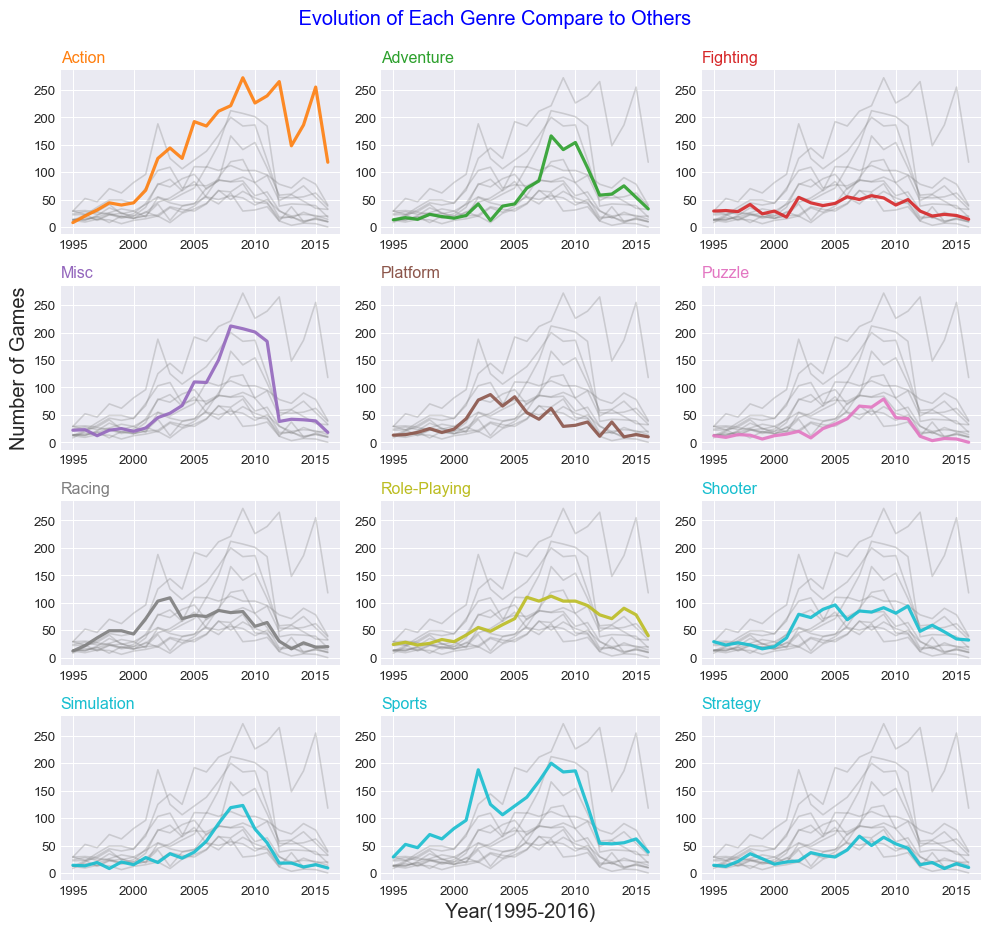

In [41]:
# Evolution of one game vs others
# Figure style
plt.style.use('seaborn-darkgrid')
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 900/my_dpi), dpi=my_dpi)

# Color palette
palette = plt.get_cmap('tab10')

# Line plot
num = 0
for column in genre_count_by_year:
    num += 1
    
#     if num==10:
#         break
    
    plt.subplot(4,3, num)
    
    # Generating all lineplot
    for item in genre_count_by_year.drop(column, axis= 1):
        plt.plot(genre_count_by_year[item], marker='', color='grey', linewidth=1.2, alpha=0.3)
    
    # Line plot for the expeceted one
    plt.plot(genre_count_by_year[column], marker='', color= palette(num), linewidth=2.4, alpha=0.9, label=column)
    
    # x-axis limit for subplot
    plt.xlim(1994,2017)
    
    # Sub plot title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color= palette(num))
    
    # Axis label for the figure
    if column == 'Sports':
        plt.xlabel('Year(1995-2016)', fontsize= 15)
    if column == 'Misc':
        plt.ylabel('Number of Games', fontsize= 15)
    
    
# Figure title    
plt.suptitle(' Evolution of Each Genre Compare to Others ', fontsize=15, fontweight=0, color='blue', y= 1.03)


plt.tight_layout()

### Now, let's figure out which year had the highest global sales?

### Now we can look at the top ten publisher who released most number of games.

In [66]:
publisher = df['Publisher'].value_counts().sort_values(ascending= False)[:10]
publisher

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          917
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             630
Take-Two Interactive             412
Name: Publisher, dtype: int64

Text(0.5, 1.0, 'Top Ten Publisher in Number of Produced Games')

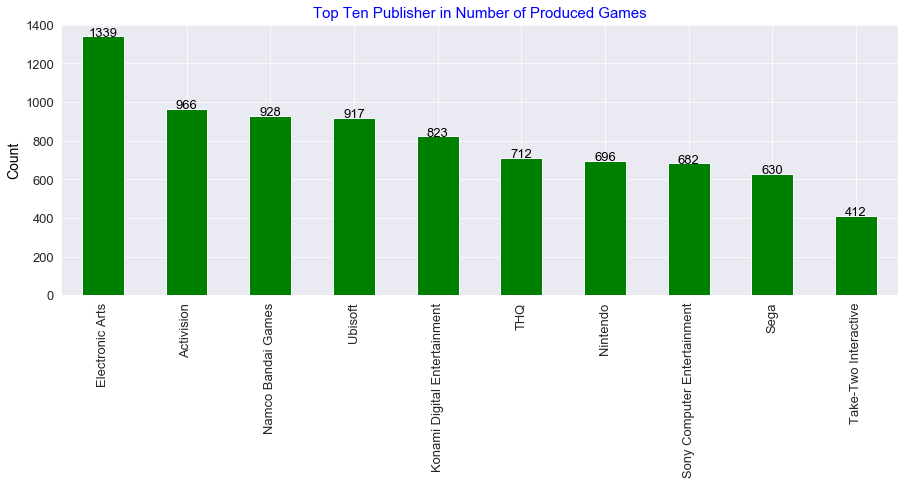

In [72]:
# we need this to add text in the graph
x = list(publisher)
y = list(publisher.index)

#plotting figure
plt.figure(figsize= [15,5])
fig = publisher.plot(kind='bar', color = 'green')

# labeling the bar
style = dict(ha= 'center', size= 13, color = 'black')

x_position = 0
for i in range(0,len(x)):
    fig.text(x_position, x[i]+2, str(x[i]), **style)
    x_position += 1

# Styling axis
plt.ylabel('Count',fontsize=14, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Title
plt.title('Top Ten Publisher in Number of Produced Games', fontsize= 15, color= 'blue')

### We already figured out the top ten game publishers, so now we can find out the top 3 released games of these publishers 

In [75]:
# Index of publisher dataframe
top_ten_publisher = list(publisher.index)
print(top_ten_publisher)

['Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft', 'Konami Digital Entertainment', 'THQ', 'Nintendo', 'Sony Computer Entertainment', 'Sega', 'Take-Two Interactive']


In [76]:
# Creating a Dataset
g_1 = df.groupby(by = ['Publisher','Genre'])

# Dictionary to make another dataframe
dic = {'Publisher':[],'Genre':[], 'Count':[]}

for item in top_ten_publisher:
    sub_publisher = g_1.count().loc[item,'Year'].sort_values(ascending = False).head(3)
    dic['Publisher'].extend((item, item, item))  # to keep the publisher name next to one another
    dic['Genre'] += list(sub_publisher.index)    # Appendong genre
    dic['Count'] += list(sub_publisher.values)   # Number of games for each genre 

<b>It might be difficult understrand the above cell. So, uncomment and run these line in different cell. And in the 'by' arg, we could use any column. we just need to count rows so it will work with any column.</b> <br><br>
<code>g_1.count().loc['Electronic Arts'].sort_values(by = 'Year', ascending = False).head()
    
#run in a different cell.
g_1.count().head(20)
</code>

In [77]:
# Creating a dataset of top three genre for each publisher.
sub_df = pd.DataFrame(dic) 
sub_df.head(5)

,Publisher,Genre,Count
0,Electronic Arts,Sports,554
1,Electronic Arts,Action,182
2,Electronic Arts,Racing,159
3,Activision,Action,308
4,Activision,Shooter,155


In [79]:
#bar height
height = list(sub_df['Count'])

# xtick label 
bars = list(sub_df['Genre'])

# index position
y_pos = np.arange(len(bars))

#color for all the bar values
color = []
name = ['blue','red','orange','green','purple','violet','olive','gray','brown','cyan']
for item in name:
    color.extend((item, item, item))

# Ticks for second axis
label = list(sub_df['Publisher']) 
ax_label = []
for item in label:
    if item not in ax_label:
        ax_label.append(item)

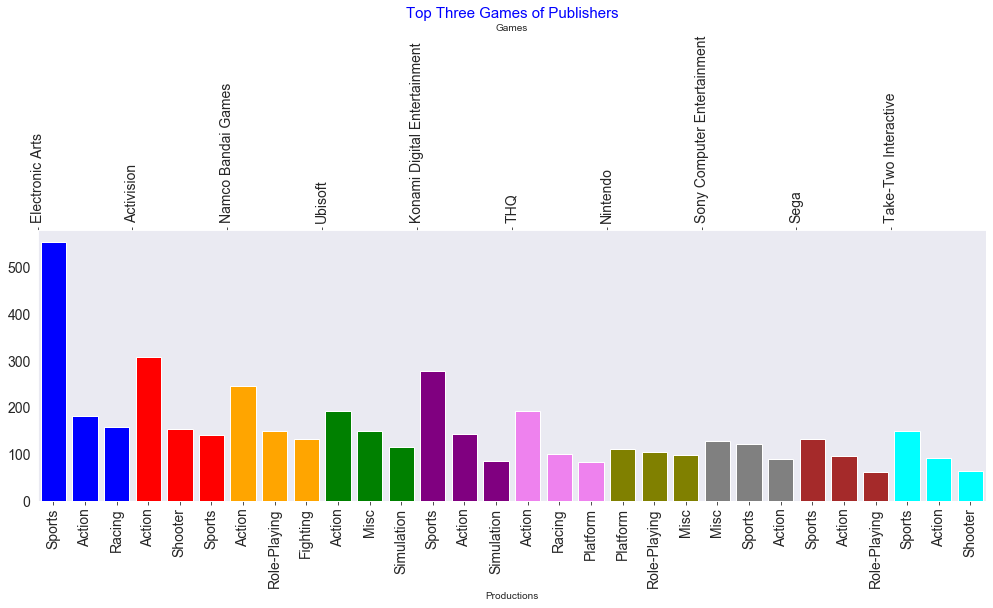

In [80]:
# Figure Style
sns.set_style(style='dark')
plt.figure(figsize=[17,5])

# Plot
plt.bar(y_pos, height, color=color)


plt.xticks(y_pos, bars, rotation = 90, fontsize=14)  # we did this in an usual way.
plt.yticks(fontsize= 14)

# Secons axis
axes1 = plt.gca()
axes2 = axes1.twiny()                 # to get another axis here we used object oriented.

axes2.set_xticks(list(range(0,30,3))) # indexing for xticks.
axes2.set_xticklabels(ax_label, fontsize= 14, rotation= 90)

# Axis label
axes1.set_xlabel("Productions")
axes2.set_xlabel("Games")

# Axis limit
axes1.set_xlim(-.5,29.5)
axes2.set_xlim(0,30)

# Title
plt.title('Top Three Games of Publishers', fontsize= 15, color= 'blue')
plt.show()

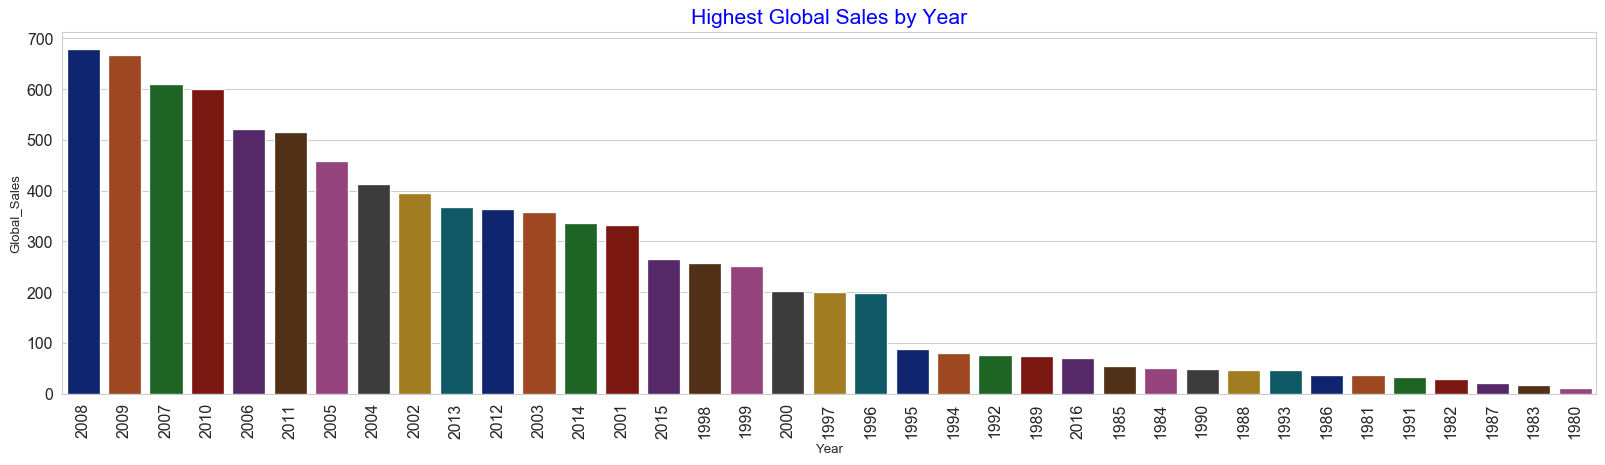

In [49]:
# Figure Size
plt.figure(figsize=[17,5], dpi= 95)

# to sort the bar in descending order
order = df.groupby(by = 'Year').sum()['Global_Sales'].sort_values(ascending= False).index

# plot
sns.barplot(x='Year',y='Global_Sales',data=df,estimator= sum, palette="dark", order= order, ci= 0)

# Axis ticks
plt.xticks(fontsize=12, rotation= 90)
plt.yticks(fontsize=12)

# Title
plt.title('Highest Global Sales by Year', fontsize= 16, color= 'blue')

plt.tight_layout()

### Let's do a line plot of sales to see how it has changed over year in different region

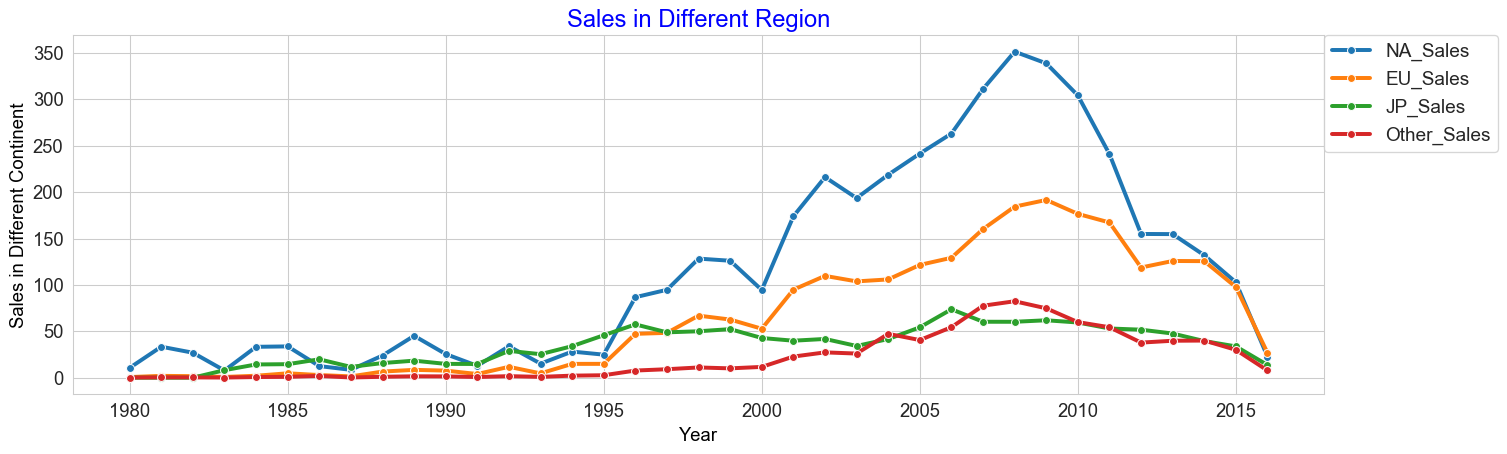

In [53]:
plt.figure(figsize=[17,5], dpi= 95)

tick = ['NA_Sales', 'EU_Sales','JP_Sales', 'Other_Sales']

for item in tick:
    sns.lineplot(x= 'Year', y= df[item], data= df, estimator= 'sum', label= item, ci=None, marker='o', linewidth= 3)

# Axis label and ticks    
plt.xlabel('Year',fontsize=14, color='black')
plt.ylabel('Sales in Different Continent',fontsize=14, color='black')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Title and legend
plt.title('Sales in Different Region', fontsize= 18, color= 'blue')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0, fontsize= 'x-large')

-   We can see, the number of sales in different continent was pretty close to each other till 1995 and then a drastic change occured to sales of North America compare to others. It might be because of their revolution in tech industry.

### Now, we will figure out the sales of a top three genre in different region. 

In [54]:
# Top three genre in number of produced games.
df['Genre'].value_counts().head(3)

Action    3250
Sports    2304
Misc      1686
Name: Genre, dtype: int64

In [55]:
# Dataframe for sales of different genre in different continents
sales_by_genre = df.groupby(by= ['Year','Genre']).sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].unstack()

# Replacing NaN Value 
sales_by_genre.fillna(0, inplace= True)

# Dropping some rows
sales_by_genre.drop(range(1980,1996), inplace= True)

In [57]:
sales_by_genre.head(2)

NA_Sales                                                               \
Genre   Action Adventure Fighting  Misc Platform Puzzle Racing Role-Playing   
Year                                                                          
1996     10.65      0.86     7.12  4.08    13.81   2.18  16.94        12.78   
1997     14.40      2.36     6.03  3.28    10.81   1.34  15.52         5.31   

                          ... Other_Sales                               \
Genre Shooter Simulation  ...    Fighting  Misc Platform Puzzle Racing   
Year                      ...                                            
1996     3.28       5.42  ...        0.75  0.36     0.83   0.09   0.84   
1997    15.00       1.90  ...        0.52  0.20     0.89   0.17   1.49   

                                                       
Genre Role-Playing Shooter Simulation Sports Strategy  
Year                                                   
1996          1.39    0.37       0.48   0.78     0.23  
1997          1.51    0.49       0.54   1.43     0.24  

[2 rows x 48 columns]

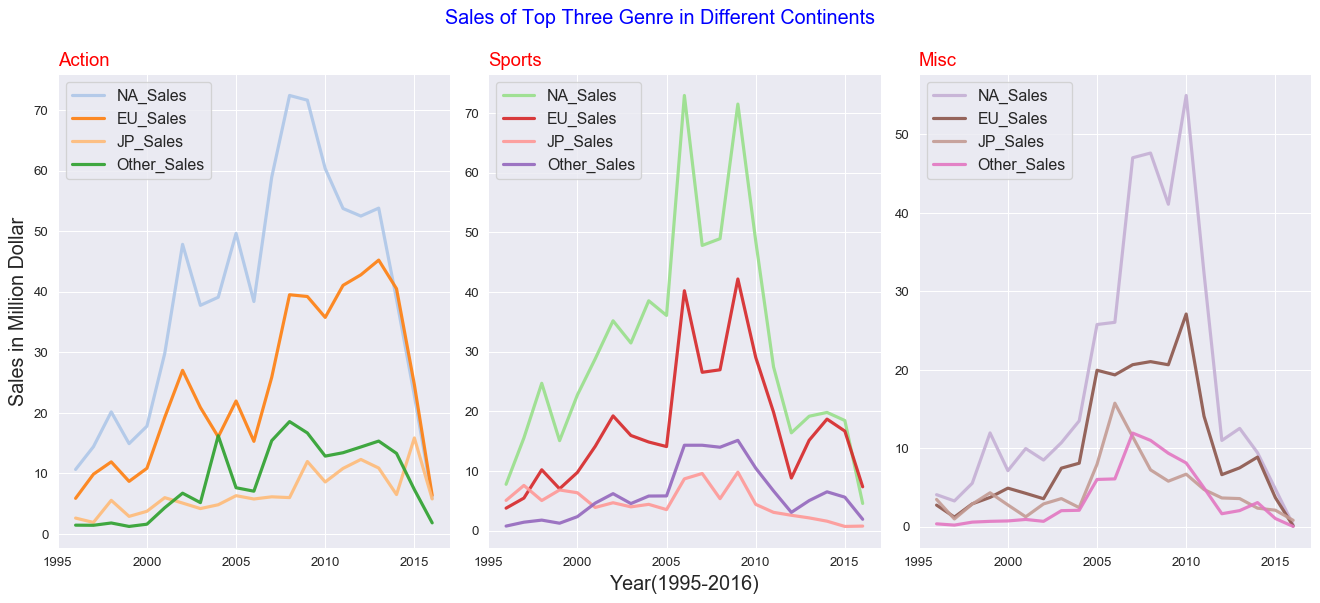

In [64]:
# Top 3 Genre index list
index = list(df['Genre'].value_counts().head(3).index)


# Figure style
sns.set_style('darkgrid')
plt.figure(figsize=[14,6], dpi=95)

# Color palette
palette = plt.get_cmap('tab20')

# Multi plot
num = 0
col_pal = 0
for name in index:
    num += 1
    plt.subplot(1,3,num)
    
    # Using .xs method to get the region sales with specific genre
    data_frame = sales_by_genre.xs(key=name, level=1, axis=1)
    
    # Line plot
    for column in data_frame:
        col_pal += 1
        plt.plot(data_frame[column], marker='', color=palette(col_pal), linewidth=2.4, alpha=0.9, label=column)
    
    # Subplot title, legend and axis ticks
    plt.title(name, loc='left', fontsize=14, fontweight=0, color='red')
    plt.legend(fontsize=12)
    plt.xticks([1995,2000,2005,2010,2015])
    
    # Figure x-axis and y-axis
    if name == 'Sports':
        plt.xlabel('Year(1995-2016)', fontsize= 15)
    if name == 'Action':
        plt.ylabel('Sales in Million Dollar', fontsize= 15)

# Figure title
plt.suptitle('Sales of Top Three Genre in Different Continents', fontsize= 15, y = 1.05, color= 'blue')

plt.tight_layout()


### Let's generate a heat map for sales of all genre

In [81]:
genre_heatmap = df.groupby(by= 'Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
genre_heatmap.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,861.77,516.48,158.64,184.92
Adventure,101.93,63.74,51.99,16.70
Fighting,220.74,100.00,87.15,36.19
Misc,396.92,211.77,106.67,73.92
Platform,445.99,200.65,130.65,51.51


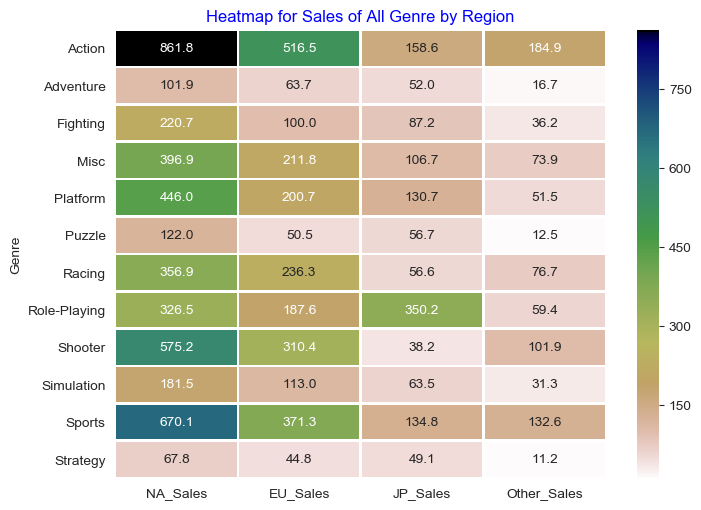

In [82]:
# Fig style
plt.figure(figsize= [8,6], dpi= 99)

# Plot
ax = sns.heatmap(genre_heatmap, annot= True, fmt= '.1f', linecolor= 'white', linewidths= 1.2, cmap= 'gist_earth_r')

# There was some kind of issue with matplotlib version. That is why i had to use the below line. Otherwise it should work fine.
# Getting the current y limit and then resizing
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .5, top - .5)

# Title
plt.title('Heatmap for Sales of All Genre by Region', color= 'blue')
plt.show()

### Let'x explore the sales percentage in pie chart

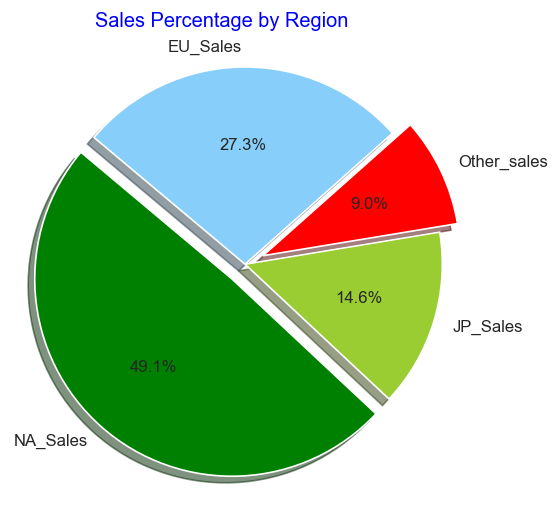

In [83]:
plt.figure(figsize=[5,5], dpi= 120)

# parameters
labels = 'NA_Sales','JP_Sales','Other_sales', 'EU_Sales'
sizes = [df['NA_Sales'].sum(),df['JP_Sales'].sum(), df['Other_Sales'].sum(), df['EU_Sales'].sum()]
colors = ['green','yellowgreen','red','lightskyblue']
explode = (0.1,0,0.1,0) # explode the highest and lowest slice.

# Pie plot
plt.pie(sizes, explode= explode, labels= labels, colors= colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # to get a circle shape
plt.title('Sales Percentage by Region', color= 'blue', y= 1.02, x= .45)
plt.show()

### Pairplot

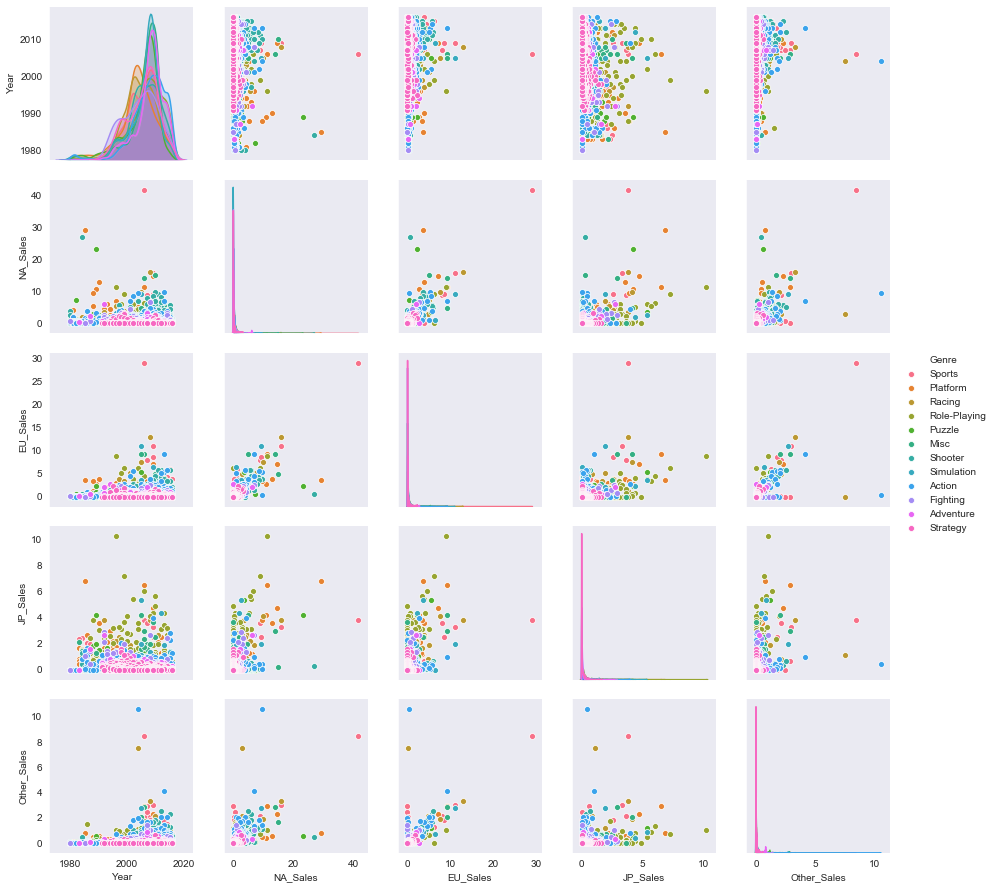

In [97]:
sns.pairplot(df[['Year','NA_Sales','Genre','EU_Sales','JP_Sales','Other_Sales']], hue= 'Genre' )

### Correlation

Text(0.5, 1, 'Correlation Between Columns')

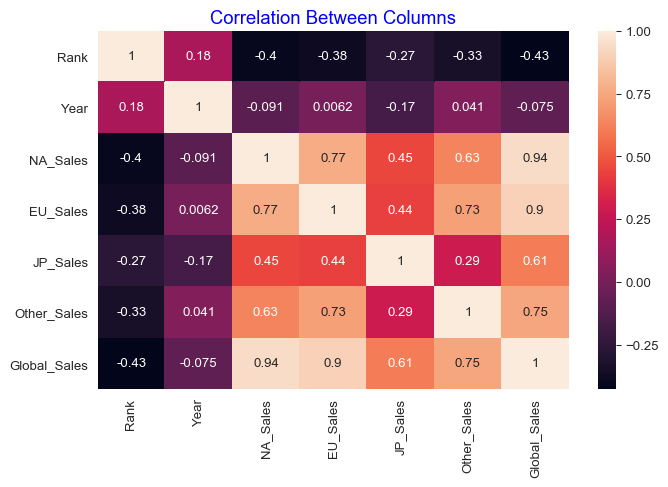

In [98]:
# Figure style
plt.figure(figsize=[8,5], dpi= 95)

# PLot
ax = sns.heatmap(df.corr(), annot= True)

# There was some kind of issue with matplotlib version. That is why i had to use the below line. Otherwise it should work fine.
# Getting the current y limit and then resizing
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .5, top - .5)

# Title
plt.title('Correlation Between Columns', fontsize= 14, color= 'blue')

### Thank you so much for spending your valuable time on my project. I would really appreciate if you give me some feedback on this project. 